In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import datetime

# Computing Risk

1. 
(a).
\begin{align}
    E(\|\overrightarrow{X}\|_2^2) &= E(X_1^2 + X_2^2 + X_3^2 +...+X_n^2)\\
    &= E(X_1^2) + E(X_2^2) +...+E(X_n^2)\\
    &= 2 + 2 + ... + 2 = 2n
\end{align}
(b).
\begin{align}
    E(\|\overrightarrow{X}\|_\infty) &= E(max(|X_i|))\\
    &= \frac{1}{5^n}*0 + (\frac{3}{5}^n-\frac{1}{5}^n) *1 + (1-\frac{3}{5}^n)*2\\
    &= 2-\frac{1^n}{5^n}-\frac{3^n}{5^n}
\end{align}
(c) The covariance matrix of $\overrightarrow{X}$ is:
\begin{align}
    cov(\overrightarrow{X}) &= 
    \begin{pmatrix}
    \sigma X_1 & cov(X_1,X_2) &...& cov(X_1,X_n)\\
    cov(X_2,X_1) &\sigma X_2 & ...& cov(X_2,X_n)\\
    ......\\
    cov(X_n,X_1) &cov(X_n,X_2) & ... &\sigma X_n
    \end{pmatrix} \\
    &= \begin{pmatrix}
    \sigma X_1 &0 &...& 0\\
   0 &\sigma X_2 & ...& 0\\
    ......\\
    0&0& ... &\sigma X_n
    \end{pmatrix} \\
    &= \begin{pmatrix}
   2 &0 &...& 0\\
   0 &2 & ...& 0\\
    ......\\
    0&0& ... &2
    \end{pmatrix}
\end{align}

2. 
(a).
According to Jensen's inequality: $E[(a-y)^2] \geq E^2[(a-y)]$


i.\begin{align}
    a^* &=  argmin_a E[(a-y)^2]\\
    E[(a^*-y)^2]&= E^2(a^*-y)
\end{align}
Thus, $a^* = E(y)$.


ii.
Bayes Risk:
\begin{align}
    R(f^*) &= E[(a^*-y)^2]\\
    &= E[(E(y)^*-y)^2]\\
    &= E[(E^2(y)] - E[2E(y)*y] + E[y^2]\\
    &= E^2(y) + E(y^2) - 2E[E(y)]*E(y)\\
    &= E(y^2) - E^2(y) = var(y)
\end{align}

(b). 

i.
\begin{equation}
    f(x^*) = argmin_a E[(a-y)^2|x]
\end{equation}
From (a), we know that $a^* = E(y)$, similarly, $argmin_a E[(a-y)^2|x] = E(y|x)$

ii.TP $E[(E(y|x) - y)^2] \leq E[(f(x)-y)^2]$\\
we decompose the right hand side:
\begin{align}
    E[(f(x)-y)^2] &= E[f(x)^2 - 2yf(x) + y^2]\\
    &=  E[f(x)^2] - E[2yf(x)] + E[y^2]\\
    &=  E[f(x)^2] - 2E[y]E[f(x)] + E[y^2]\\
    &= E[f(x)^2] - 2E[E(y|X)]E[f(x)] + E[y^2]\\
    &=  E[f(x)^2] - 2E[E(y|X)f(x)] +E^2(y|X)- E^2(y|X) + E[y^2]\\
    &= E[(f(x) - E(y|x))^2] + E[E[y^2|x]] - E^2(y|X)\\
    &= E[(f(x) - E(y|x))^2] + E[E[y^2|x] - E^2(y|X)]\\
    &= E[(f(x) - E(y|x))^2] + E[var(y|x)]\\
    &= E[(f(x) - E(y|x))^2] + E[(y - E(y|x))^2]
\end{align}
Thus, the inequality becomes:
\begin{equation}
    E[(E(y|x) - y)^2] \leq E[(f(x) - E(y|x))^2] + E[(y - E(y|x))^2]
\end{equation}
Since $E[(f(x) - E(y|x))^2] \geq 0$, the inequality is proved.

# Linear Regression

## 1. feature_normalization

In [2]:
def is_constant(f):
        l = f[0]
        for i in range(1,len(f)):
            if f[i] != l:
                break
            else:
                l = f[i]
        return f[i] == l

In [3]:
def feature_normalization(train, test):
#     """Rescale the data so that each feature in the training set is in
#     the interval [0,1], and apply the same transformations to the test
#     set, using the statistics computed on the training set.

#     Args:
#         train - training set, a 2D numpy array of size (num_instances, num_features)
#         test - test set, a 2D numpy array of size (num_instances, num_features)

#     Returns:
#         train_normalized - training set after normalization
#         test_normalized - test set after normalization
#     """
    # TODO
    y = []
    minimum = []
    for x in range(len(train.T)):
        if is_constant(train.T[x]):
            continue
        else:
            s = min(train.T[x])
            minimum.append(s)
            m = max(train.T[x])
            y.append(1/float(m-s))
    minimum = np.array(minimum)
    #broadcast on train and test data
    return np.dot((train - minimum),np.diag(y)), np.dot((test - minimum),np.diag(y))

#### Importing data

In [4]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
    
    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    X_train, X_test, y_train, y_test = main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


## 2.

(a). $J(\theta ) = \frac{1}{m} * (X\theta - y)^T*(X\theta - y)$

(b). $\delta J(\theta ) = \frac{2}{m} * (X \theta - y)^T*X$

(c). $J(\theta + \eta h) = J(\theta) + \eta \delta J(\theta)^Th$

(d). $ \theta' = \theta - \eta \delta J(\theta) = \theta - \frac{2 \eta}{m} X^T(X\theta-y), \eta > 0$

##### (e). The square loss function

In [5]:
def compute_square_loss(X, y, theta):
#     """
#     Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

#     Args:
#         X - the feature vector, 2feature_normalizationD numpy array of size (num_instances, num_features)
#         y - the label vector, 1D numpy array of size (num_instances)
#         theta - the parameter vector, 1D array of size (num_features)

#     Returns:
#         loss - the average square loss, scalar
#     """
    loss = 0 #Initialize the average square loss
    yhat = np.dot(X,theta)
    for i in range(len(yhat)):
        loss += np.square(y[i]-yhat[i])
    loss = loss/float(len(yhat))
    return loss

##### (f). The gradient of the square loss function

In [6]:
def compute_square_loss_gradient(X, y, theta):
#     """
#     Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

#     Args:
#         X - th\|e feature vector, 2D numpy array of size (num_instances, num_features)
#         y - the label vector, 1D numpy array of size (num_instances)
#         theta - the parameter vector, 1D numpy array of size (num_features)

#     Returns:
#         grad - gradient vector, 1D numpy array of size (num_features)
#     """
    #the partial derivative is essentially x_i*(y_i-y)
    ins = X.shape[0]
    diff = np.dot(X,theta) - y
    gradient = 2.0/ins * (np.dot(diff,X))
    return gradient

### 3.

###### 3(a). Gradient checker

In [11]:
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    
    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i]=1
        plus = theta + epsilon*e_i
        minus = theta - epsilon*e_i
        approx_grad[i]= (compute_square_loss(X,y,plus)-compute_square_loss(X,y,minus))/(2*epsilon)
    return (np.linalg.norm(approx_grad-true_gradient) <= tolerance)

##### 4(a). Batch gradient descent

In [12]:
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_s = datetime.datetime.now()hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    s = datetime.datetime.now()
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    for i in range(num_step+1):
        if i == 0:
            theta_hist[i] = theta
            loss_hist[i] = compute_square_loss(X, y, theta)
        gradient = compute_square_loss_gradient(X, y, theta)
        if grad_check:
            if not grad_checker(X, y, theta):
                print('Wrong Gradient at: ',alpha)
                break
        theta = theta - alpha*gradient.T
        theta_hist[i] = theta
        loss_hist[i]= compute_square_loss(X, y, theta)
    e = datetime.datetime.now()
    return theta_hist,loss_hist, e-s

##### 4(b).Experiment with the step sizes

In [10]:
# 4(b).Experiment with the step sizes
stepsizes = [0.01,0.02,0.03,0.04, 0.05,0.1,0.5]
theta_hist1,loss_hist1,t = batch_grad_descent(X_train,y_train,alpha=0.01,grad_check=True)
theta_hist2,loss_hist2,t = batch_grad_descent(X_train,y_train,alpha=0.02,grad_check=True)
theta_hist3,loss_hist3,t = batch_grad_descent(X_train,y_train,alpha=0.03,grad_check=True)
theta_hist4,loss_hist4,t = batch_grad_descent(X_train,y_train,alpha=0.04,grad_check=True)
theta_hist5,loss_hist5,t = batch_grad_descent(X_train,y_train,alpha=0.05,grad_check=True)
theta_hist10,loss_hist10,t = batch_grad_descent(X_train,y_train,alpha=0.05,grad_check=True)
theta_hist4,loss_hist8,t = batch_grad_descent(X_train,y_train,alpha=0.06,grad_check=True)
theta_hist5,loss_hist9,t = batch_grad_descent(X_train,y_train,alpha=0.07,grad_check=True)
#theta_hist6,loss_hist6 = batch_grad_descent(X_train,y_train,alpha=0.1,grad_check=True)
#theta_hist7,loss_hist7 = batch_grad_descent(X_train,y_train,alpha=0.5,grad_check=True)

Wrong Gradient at:  0.06
Wrong Gradient at:  0.07


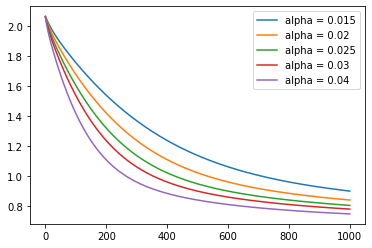

In [18]:
stepsizes_1 = [0.015,0.02,0.025,0.03,0.04]
stepsizes_2 = [0.01,0.04,0.05,0.06,0.07,0.1,0.5]
for stepsize in stepsizes_1:
    theta_hist,loss_hist,t = batch_grad_descent(X_train , y_train, alpha=stepsize, num_step=1000, grad_check=True)
    plt.plot(range(len(loss_hist)),np.log(loss_hist), label = "alpha = %s" %stepsize)
plt.legend(loc = 1)
plt.show()

In [15]:
stepsizes = [0.01,0.015,0.02,0.025,0.03,0.04,0.05]
train_loss=[]
test_loss = []
for stepsize in stepsizes:
    theta_hist,loss_hist,time = batch_grad_descent(X_train , y_train, alpha=stepsize, num_step=1000, grad_check=True)
    train_loss.append(loss_hist[-1])
    test_loss.append(compute_square_loss(X_test,y_test,theta_hist[-1]))
    print("time taken at stepsize",stepsize,"is",time)


time taken at stepsize 0.01 is 0:00:18.257578
time taken at stepsize 0.015 is 0:00:19.637929
time taken at stepsize 0.02 is 0:00:18.662639
time taken at stepsize 0.025 is 0:00:18.787513
time taken at stepsize 0.03 is 0:00:18.969445
time taken at stepsize 0.04 is 0:00:18.397511
time taken at stepsize 0.05 is 0:00:18.228431


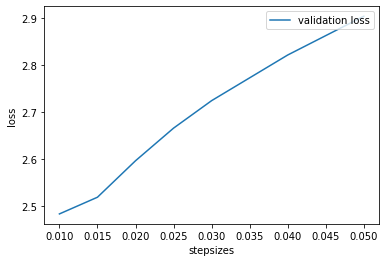

In [16]:
plt.plot(stepsizes,test_loss, label = 'validation loss')
plt.xlabel('stepsizes'),plt.ylabel('loss')
plt.legend(loc=1)
plt.show()


After experimenting with different stepsizes, the wrong gradient starts at alpha = 0.055. Thus we zoomed in the range to 0.01-0.05. Although based on the test loss, stepsize = 0.01 yields the smallest test-loss, 0.01 converges very slow. Thus we need to make a trade-off between the time and accuracy. In practice, I think 0.025 would be a better choice because it also takes the least amount of time.

##### 4c. (Optional) Backtracking line search

In [13]:
#Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
def backtracking_line_search(X, y, f_loss, f_grad,gamma=0.5, lr = 0.5,num_step=1000,epsilon = 1e-6):
    s = datetime.datetime.now()
    num_instances, num_features = X.shape[0], X.shape[1]
    loss_hist = []
    theta = np.zeros(num_features) #Initialize theta
    
    loss = f_loss(X, y, theta)
    loss_hist.append(loss)
    err = 1.0
    it = 0
    alpha = 0.5
    
    while err > epsilon and it < num_step:
        gradient = f_grad(X, y, theta)
        loss = f_loss(X, y, theta)
        
        theta_2 = theta - lr*gradient
        loss_2 = f_loss(X,y,theta_2)
        loss_hist.append(loss_2)
        
        
        if loss - loss_2 < alpha * lr * np.dot(gradient,gradient):
            lr = gamma *lr
            theta = theta_2
            err = np.abs(loss-loss_2)
            
        it+=1
    e = datetime.datetime.now()
    return theta,loss_hist,lr,e-s,it

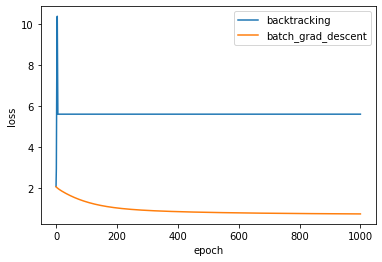

alpha for backtracking linesearch is: 0.015625
iteration for backtracking linesearch is: 1000
time for backtracking linesearch is: 0:00:00.384944
time for batch gradient descent is: 0:00:00.384944


In [68]:
theta_1,loss_hist1,alpha,time1,iteration = backtracking_line_search(X_train, y_train, f_loss = compute_square_loss, f_grad=compute_square_loss_gradient,gamma=0.5, num_step=1000,epsilon = 1e-4)
theta_2,loss_hist2,time2 = batch_grad_descent(X_train,y_train,alpha = 0.05,num_step = 1000,grad_check = False)
plt.plot(range(len(loss_hist1)),np.log(loss_hist1), label = "backtracking")
plt.plot(range(len(loss_hist2)),np.log(loss_hist2), label = "batch_grad_descent")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 1)
plt.show()
print("alpha for backtracking linesearch is:", alpha)
print("iteration for backtracking linesearch is:", iteration)
#print("final loss for backtracking linesearch is:",loss_hist1[-1] )
print("time for backtracking linesearch is:", time1)
print("time for batch gradient descent is:", time1)

# Ridge Regression

1. \begin{align}
    J(\theta ) &= \frac{1}{m} * (X\theta - y)^T*(X\theta - y) + \lambda \theta^T\theta \\
    \delta J(\theta ) &= \frac{2}{m} * (X \theta - y)^TX + 2\lambda \theta^T \\
    \theta' &= \theta -  \eta \delta J(\theta )\\
    \theta' &= \theta -  \eta (\frac{2}{m} * (X \theta - y)^TX + 2\lambda \theta^T)
    \end{align}

### 2.The gradient of regularized batch gradient descent

In [14]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    num_features = X.shape[0]
    diff = np.dot(X,theta)
    grad = 2/num_features*np.dot((diff - y),X) + 2*lambda_reg*theta
    return grad


### 3.Regularized batch gradient descent

In [15]:
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficientprint("iteration for backtracking linesearch is:", iteration)
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    for i in range(num_step+1):
        if i == 0:
            theta_hist[i] = theta
            loss_hist[i] = compute_square_loss(X, y, theta)
        gradient = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta = theta - alpha*gradient.T
        theta_hist[i] = theta
        loss_hist[i]= compute_square_loss(X, y, theta)
    
    return theta_hist,loss_hist

4. The corresponding weight for bias term will decrease when we increase B. Thus, if we increase B to a large number, the corresponding weight will be significantly small. And thus the regularization of that term will also be very small, which can help us prevent shrinkage from regularization.

#### 5. Choosing lambda

In [25]:
#Experiment with lambdas
lambdas = [10**(-7),10**(-5),0.001,0.01,0.1,10,100]
test_losses = []
train_loss = []
for l in lambdas:
    thetas,losses = regularized_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=l, num_step=1000)
    train_loss.append(float(np.sum(losses))/len(losses))
    test_loss = compute_square_loss(X_test,y_test,thetas[-1])
    test_losses.append(test_loss)
#theta_hist1,loss_hist1 = backtracking_line_search(X_train, y_train, max_alpha = 0.05, beta=0.8, num_step=1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


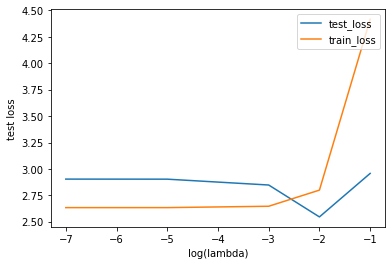

In [26]:
#plotting the test losses
plt.plot(np.log10(lambdas), test_losses,label = "test_loss")
plt.plot(np.log10(lambdas), train_loss,label = "train_loss")
plt.legend(loc = 1)
plt.xlabel("log(lambda)")
plt.ylabel('test loss')
plt.show()

Observing from the result, we can see that the optimal lambda is around $10^{-2}$

6. In practice, it's more preferable to select the theta that works best with test set, because we hope that our model can have better generalizability.

# Stochastic Gradient Descent

1. \begin{align}
J(\theta) &= \frac{1}{m} \sum ^m_{i=1} ((h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta)\\
&=  \frac{1}{m} \sum ^m_{i=1} ((h_{\theta}(x_i) - y_i)^2 + \lambda  \theta_i^2)\\
f_i(\theta) &= (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta
\end{align}

2. 
To show that $f_i(\theta)$  is an unbiased estimator:
\begin{align}
E(\delta f_i(\theta)) &= \frac{1}{n} \sum_{i=1}^n E(\delta f_{m_i}(\theta_m))\\
&= \frac{1}{n} \sum_{i=1}^n E(\delta f_{m_i}(\theta_{m_i}))\\
&= E(\delta f_{m_1}(\theta_{m_1}))\\
&= \sum_{i=1}^m P(mi = i) \delta f_i(\theta)\\
&= \frac{1}{m} \sum_{i=1}^m (\delta f_i(\theta)) = \delta J(\theta)
\end{align}

3. \begin{align} \theta' &= \theta + \eta J(\theta)\\
&= \theta_i - \eta [2 \theta_i^Tx_i - y_i)x_i + 2 \lambda \theta_i ]
\end{align}

#### 4.Stochastic gradient descent

In [16]:
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000,c=0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    step_size = 1
    for t in range(num_epoch):
        shuffle = np.random.permutation(num_instances)
        for i in shuffle:
            theta_hist[t,i] = theta
            loss_hist[t,i] = compute_square_loss(X,y,theta) +  np.sum(theta ** 2)*lambda_reg
            gradient =  compute_regularized_square_loss_gradient(X[i], y[i], theta, lambda_reg)
            if isinstance(alpha,str):
                if alpha=='1/sqrt(t)':
                    theta = theta - c/np.sqrt(step_size)*gradient
                elif alpha=='1/t':
                    theta = theta - c/ step_size * gradient
                step_size +=1 
            else:
                theta = theta - alpha*gradient
    return theta_hist, loss_hist

#### 5. Choosing weights with SGD

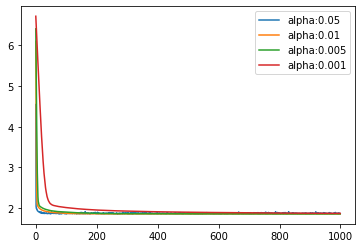

In [28]:
## Experiment with fixed step size
alphas = [0.05,0.01,0.005,0.001]
for a in alphas:
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=a, lambda_reg=10**-2, num_epoch=1000)
    avg_loss = loss_hist.mean(axis = 1)
    plt.plot(range(len(loss_hist)),np.log(avg_loss),label='alpha:'+str(a))
plt.legend(loc=1)
plt.show()

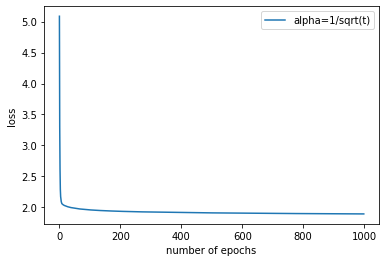

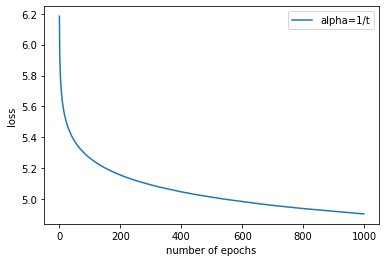

In [29]:
## Experiment with dynamic step sizes
for s in ['1/sqrt(t)','1/t']:
    theta_hist,loss_hist = stochastic_grad_descent(X_train,y_train,lambda_reg=10**-2,alpha=s,c=0.1)
    avg_loss = loss_hist.mean(axis = 1)
    plt.plot(range(len(loss_hist)),np.log(avg_loss),label='alpha=%s' %s)
    plt.xlabel("number of epochs")
    plt.ylabel("loss")
    plt.legend(loc=1)
    plt.show()

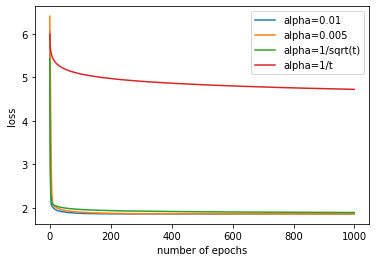

In [30]:
# Combining the stepsizes together to compare, for fixed stepsize we only choose 0.01 and 0.05 
# because 0.001 and 0.005 converges comparatively much slower
alphas = [0.01,0.005,'1/sqrt(t)','1/t']
for s in alphas:
    theta_hist,loss_hist = stochastic_grad_descent(X_train,y_train,lambda_reg=10**-2,alpha=s,c=0.1)
    avg_loss = loss_hist.mean(axis = 1)
    plt.plot(range(len(loss_hist)),np.log(avg_loss),label='alpha=%s' %s)
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend(loc=1)
plt.show()

Observing from the result, we conclude that SGD takes more time to reach the optimized result. In terms of fixed alpha, the performance was similar, and the overall performance is slightly better than dynamic steps as 1/sqrt(t). In terms of the dynamic steps, '1/sqrt(t)' performs better while 1/t doesn't converge.

### 6. more on  SGD

###### optional 1: Experiment with using averaged theta and the last theta in different stepsizes

In [19]:
avg_test_loss, sgd_test_loss = [],[]
alphas = [0.05,0.01,0.005,0.001,'1/sqrt(t)','1/t']

for s in alphas:
    theta_hist,loss_hist = stochastic_grad_descent(X_train,y_train,lambda_reg=10**-2,alpha=s,c=0.1)
    theta_avg =np.mean(np.mean(np.array(theta_hist),axis=0),axis=0) 
    theta_last =np.mean(theta_hist[-1],axis=0) 
    avg_test_loss.append(compute_square_loss(X_test,y_test,theta_avg))
    sgd_test_loss.append(compute_square_loss(X_test,y_test,theta_last))

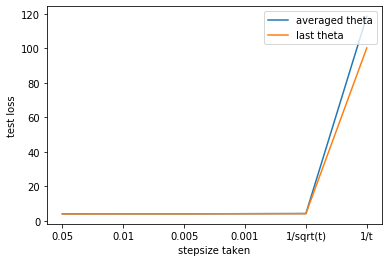

In [20]:
plt.plot(alphas,avg_test_loss,label='averaged theta')
plt.plot(alphas,sgd_test_loss,label='last theta')

plt.xlabel("stepsize taken")
plt.ylabel("test loss")
plt.legend(loc=1)
plt.show()

Observing from the pattern, these aren't much difference on test loss between average theta and using the last theta.Because if we don't consider 1/t, the performance is nearly the same.

##### Optional 2: Experiment of regularized SGD with eta

In [23]:
def eta_stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000,c=0.1,eta0 = 0):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    step_size = 1
    for t in range(num_epoch):
        shuffle = np.random.permutation(num_instances)
        for i in shuffle:
            theta_hist[t,i] = theta
            loss_hist[t,i] = compute_square_loss(X,y,theta) +  np.sum(theta ** 2)*lambda_reg
            gradient =  compute_regularized_square_loss_gradient(X[i], y[i], theta, lambda_reg)
            if eta0 == 0:
                if isinstance(alpha,str):
                    if alpha=='1/sqrt(t)':
                        theta = theta - c/np.sqrt(step_size)*gradient
                    elif alpha=='1/t':
                        theta = theta - c/ step_size * gradient
                    step_size +=1 
                else:
                    theta = theta - alpha*gradient
            else:
                alpha = eta0 / (1+eta0*lambda_reg*step_size)
                theta = theta - alpha*gradient
                step_size += 1
    return theta_hist, loss_hist

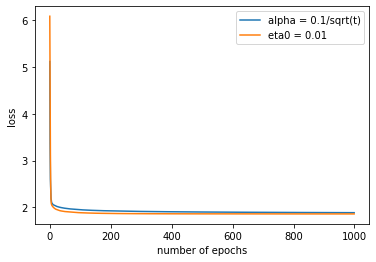

In [27]:
# for eta0 =0.01 and alpha = 0.01, eta0 = 0
theta_hist1,loss_hist1 = stochastic_grad_descent(X_train,y_train,lambda_reg=10**-2,alpha='1/sqrt(t)',c=0.1)
theta_hist2,loss_hist2 = eta_stochastic_grad_descent(X_train,y_train,lambda_reg=10**-2,alpha=0.01,c=0.1,eta0 = 0.01)
plt.plot(range(len(loss_hist1)),np.log(np.mean(loss_hist1,axis=1)),label='alpha = 0.1/sqrt(t)')
plt.plot(range(len(loss_hist2)),np.log(np.mean(loss_hist2,axis=1)),label='eta0 = 0.01')
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend(loc=1)
plt.show()

Observing from the graph, with eta, the SGD converge faster than simply using alpha = 0.1/sqrt(t).